# Examen PrÃ¡ctico

#### 01-3900 | Ciencia de datos | 2025

Alumno:

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros anÃ¡lisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condiciÃ³n laboral (Activo, Pasivo etc).
Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros anÃ¡lisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus.
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la mÃ©trica que considere correspondiente.



## Como desarrollar el exÃ¡men

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general.

La nota derivarÃ¡ de: </BR>
1.La calidad de la clasificaciÃ³n realizada</BR>
2.La fundamentaciÃ³n de los pasos realizados</BR>
3.Lo sencillo de llevar a producciÃ³n el desarrollo</BR>



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su mediciÃ³n y la mediciÃ³n del docente recuerde y aplique conceptos de test, validaciÃ³n cruzada y evite los errores comunes de sesgo de selecciÃ³n y fuga de datos (Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html)"   

Al final del notebook encontrarÃ¡ un bloque de cÃ³digo que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el cÃ³digo funciona. Desarrolle el notebook como considere para finalmente asignar el mejor clasificador o pipeline que usted haya obtenido remplazando en f_clf = None, None por su clasificador o pipeline. Si no utiliza un pipeline, implemente todas las transformaciones entre esa lÃ­nea y la predicciÃ³n final.

Persista modelos si realiza procesos que demoren (Mas de 10 minutos es mucho), alternativamente si quiere realizar bÃºsquedas exhaustivas de hiperparametros o variables explicite el procedimiento y luego utilice los valores obtenidos para ajustar un clasificador/regresor y que los tiempos sean posibles en la correcciÃ³n. Todas las herramientas vistas en clase estÃ¡n disponibles. Verifique que los docentes pueden ejecutar su clasificador / regresor usando el cÃ³digo adjunto y los datos "fuera de la caja" para validar la calidad su modelo.  

En materiales del MIEL/GIT se adjuntan un notebooks con algunas ideas para automatizar el proceso (Pipelines/Transformadores customizados).

## Desarrollo del codigo

Importacion de biblotecas y dependencias

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df_pacientes = pd.read_csv('/content/TP_Virus_Alumnos.csv') #este archivo solo esta en tiempo de ejecucion hay que definir desp como lo usamos desde github


Analisis exploratorio

In [26]:
df_pacientes.head(10)
# A simple vista podemos observar:
# la edad parece ser del tipo flotante --> capaz es conveniente convertir el dato a entero
# el peso es del tipo float con una cantidad innecesaria de decimales --> truncar
# la columna laboral habria que analizarla
# analizar el peso de los valores nulos

,Edad,Genero,Peso,Laboral,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,target
0,9.0,Femenino,36.410602,Inactivo,0,3.139714,6.929112,63.712640,73.880613,15.087239,90.400193,2.015331,1.633836,51.411632,0
1,58.0,Masculino,115.507184,Inactivo,4,2.953914,4.660136,64.582610,73.669319,14.503106,90.817947,0.973317,-0.439358,1000000.000000,0
2,74.0,Masculino,81.249035,Activo,3,1.365200,3.005861,63.613454,75.103984,14.077988,91.741638,3.243344,0.380413,1000000.000000,1
3,NaN,Masculino,77.985589,No_declara,0,2.329285,4.344642,64.433115,73.402436,15.583846,91.741709,3.188290,-0.226046,NaN,0
4,1.0,Femenino,13.446208,Inactivo,0,-0.062975,3.938741,65.122602,75.007982,16.961593,90.668625,2.729202,0.589698,21.627303,1
5,39.0,Masculino,100.752944,Activo,4,0.574689,3.868364,63.126609,73.410501,15.789951,89.211917,1.169552,1.099371,115.070380,0
6,77.0,Masculino,81.238369,Inactivo,4,1.531349,4.318537,63.513104,71.025204,14.779903,89.160829,2.034808,1.116236,1000000.000000,1
7,48.0,Masculino,108.241968,No_declara,1,3.192311,4.072476,63.834061,73.652055,16.787495,92.143975,1.745791,1.386591,104.976352,0
8,63.0,NaN,81.907770,Activo,4,1.185980,3.799356,63.638205,75.423896,14.515515,88.874644,1.662188,0.514841,119.076322,1
9,29.0,NaN,82.157068,Activo,0,2.464750,5.324854,63.820457,72.639370,15.890319,90.383575,0.639324,-0.841893,1000000.000000,1


In [19]:
# verificamos los tipos de datos y cantidad de columnas
df_pacientes.dtypes

,0
Edad,float64
Genero,object
Peso,float64
Laboral,object
hijos,int64
BLD01,float64
REC1,float64
REC2,float64
REC3,float64
REC4,float64


In [25]:
print("Tamaño del dataframe : {}".format(df_pacientes.shape))

Tamaño del dataframe : (4200, 15)


In [21]:
# Verificamos si hay valores nulos para imputar
df_pacientes.isnull().sum()

,0
Edad,822
Genero,1682
Peso,0
Laboral,0
hijos,0
BLD01,0
REC1,0
REC2,0
REC3,0
REC4,0


target
0    2493
1    1707
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

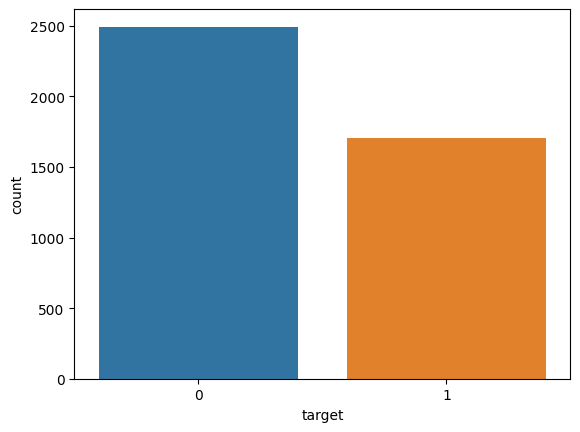

In [24]:
# Analisis de la distribución de la variable target
print( df_pacientes.target.value_counts() )
sns.countplot(x='target', data=df_pacientes, hue='target', legend=False)

las variables numéricas son:
 ['Edad', 'Peso', 'hijos', 'BLD01', 'REC1', 'REC2', 'REC3', 'REC4', 'REC5', 'BLD02', 'BLD03', 'LVL', 'target']


<Axes: >

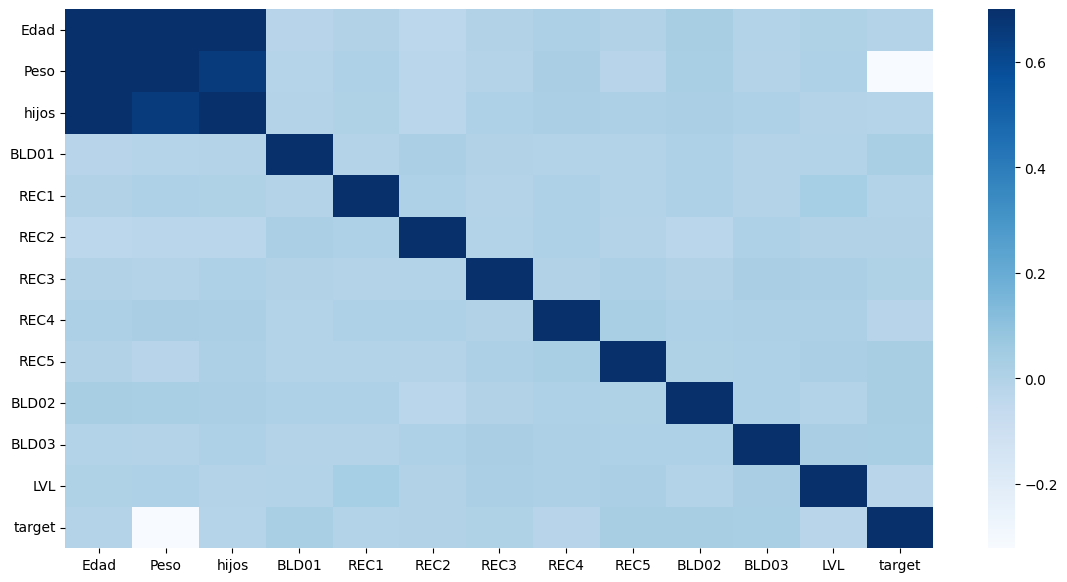

In [28]:
# identificamos las variables numéricas
numerical = [var for var in df_pacientes.columns if df_pacientes[var].dtype!='O']
print('las variables numéricas son:\n', numerical)
plt.figure(figsize=(14,7))
sns.heatmap(df_pacientes[numerical].corr(), vmax=.7, cmap ='Blues', fmt=".2f")

## Evaluacion final - Docente + Alumno

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador/pipeline posible (previamente entrenado si es necesario)

#Leemos el dataset de evaluaciÃ³n, simulando producciÃ³n
if PRODUCCION==False:
    df = pd.read_csv("TP_Virus_Alumnos.csv")
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones en caso de no ser un pipeline completo. Preferiblemente, el mejor pipeline debe incluir todas las transformaciones necesarias.
#Si es pipeline ejecutar el fit (tener en cuenta el tiempo). Si mediante exploraciÃ³n / busqueda exhaustiva se encontrÃ³ el mejor clasificador
#harcodear sus hiperparametros (Adjuntar cÃ³digo y explicaciÃ³n de como se encontrÃ³ el mejor clasificador).

#EvaluaciÃ³n final
y_pred = best_clf.predict(X_prod)
print(classification_report(y_prod, y_pred))